Found 7041 images belonging to 2 classes.
Found 3010 images belonging to 2 classes.
Found 5108 images belonging to 2 classes.
Class indices: {'painting': 0, 'photos': 1}
Epoch 1/10


/Users/Neftalem/Documents/Dev/paintingORphoto/porp/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/Neftalem/Documents/Dev/paintingORphoto/porp/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


221/221 ━━━━━━━━━━━━━━━━━━━━ 54s 242ms/step - accuracy: 0.6644 - loss: 0.6272 - val_accuracy: 0.7047 - val_loss: 0.5628
Epoch 2/10
221/221 ━━━━━━━━━━━━━━━━━━━━ 58s 263ms/step - accuracy: 0.7419 - loss: 0.5208 - val_accuracy: 0.7641 - val_loss: 0.4801
Epoch 3/10
221/221 ━━━━━━━━━━━━━━━━━━━━ 61s 277ms/step - accuracy: 0.7916 - loss: 0.4400 - val_accuracy: 0.7814 - val_loss: 0.4572
Epoch 4/10
221/221 ━━━━━━━━━━━━━━━━━━━━ 66s 299ms/step - accuracy: 0.8239 - loss: 0.3838 - val_accuracy: 0.8103 - val_loss: 0.4328
Epoch 5/10
221/221 ━━━━━━━━━━━━━━━━━━━━ 74s 334ms/step - accuracy: 0.8547 - loss: 0.3315 - val_accuracy: 0.8090 - val_loss: 0.4480
Epoch 6/10
221/221 ━━━━━━━━━━━━━━━━━━━━ 66s 300ms/step - accuracy: 0.8918 - loss: 0.2660 - val_accuracy: 0.8183 - val_loss: 0.4687
Epoch 7/10
221/221 ━━━━━━━━━━━━━━━━━━━━ 64s 290ms/step - accuracy: 0.9085 - loss: 0.2257 - val_accuracy: 0.8013 - val_loss: 0.5291
Epoch 8/10
221/221 ━━━━━━━━━━━━━━━━━━━━ 64s 291ms/step - accuracy: 0.9252 - loss: 0.1926 - val

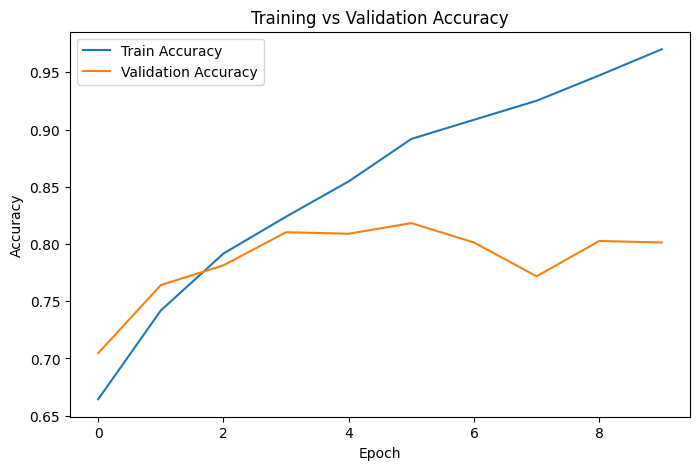

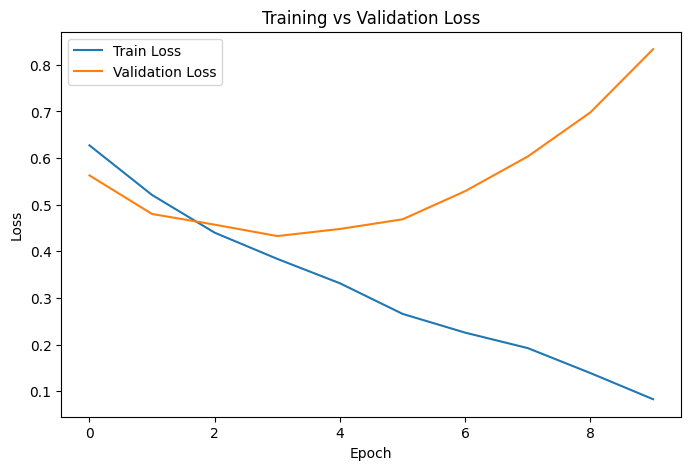

✅ Testing on 30 images (15 paintings, 15 photos)



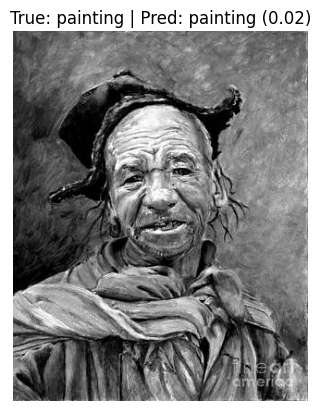

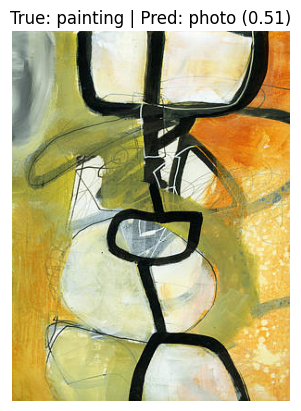

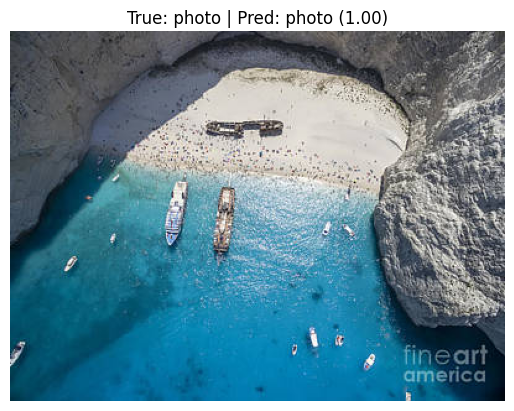

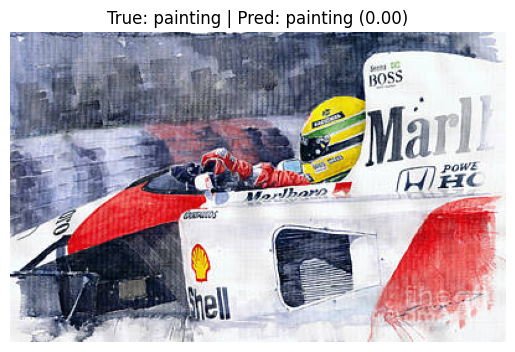

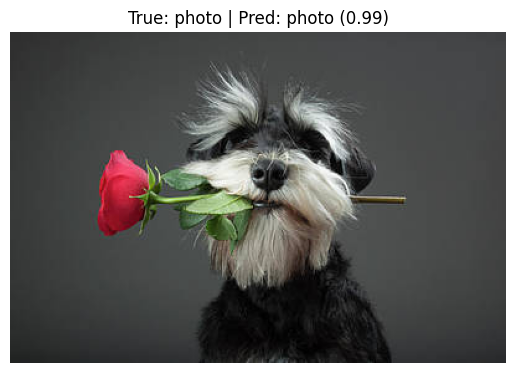

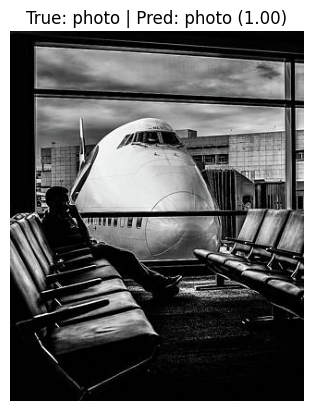

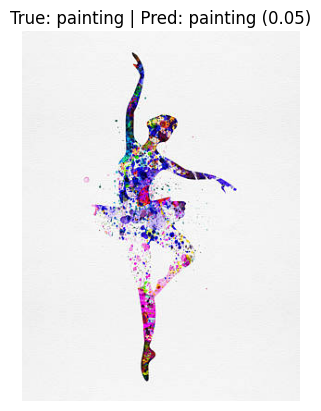

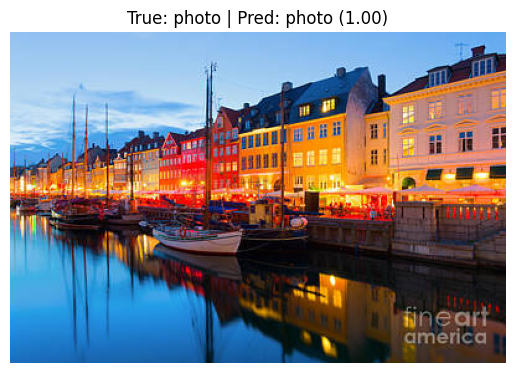

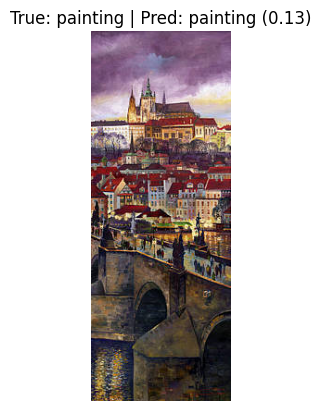

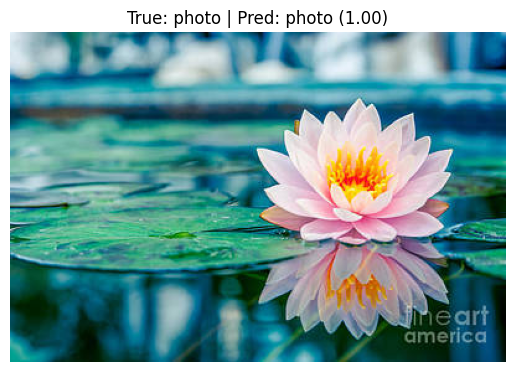

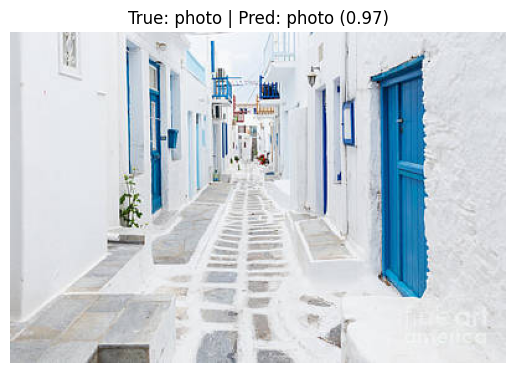

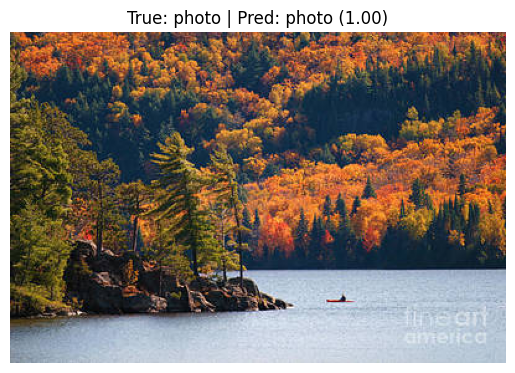

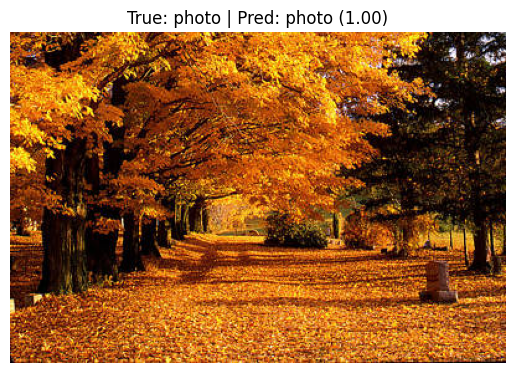

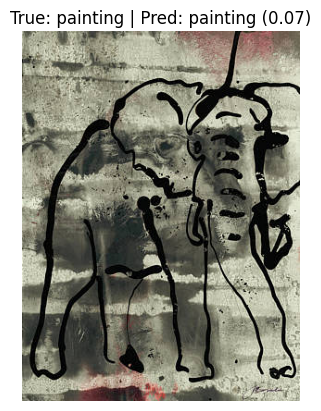

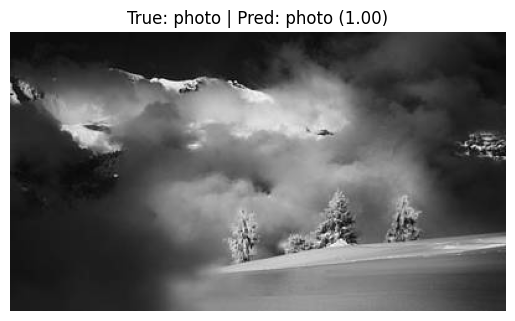

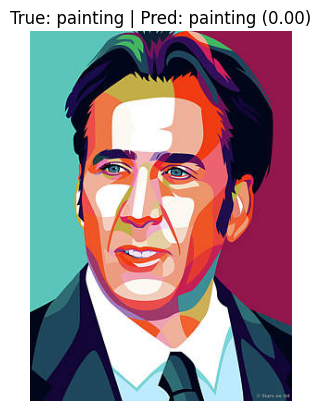

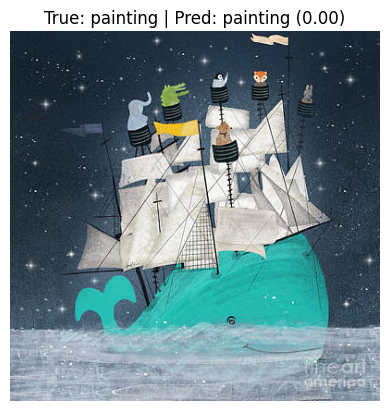

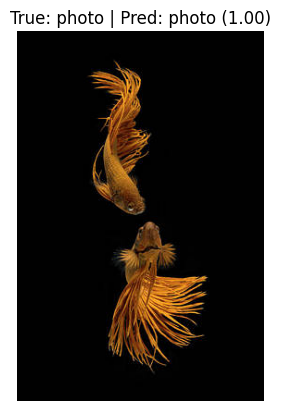

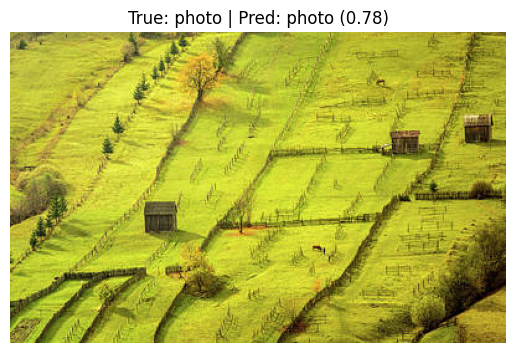

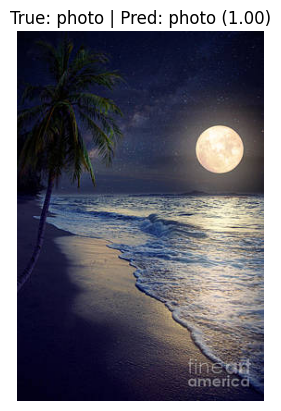

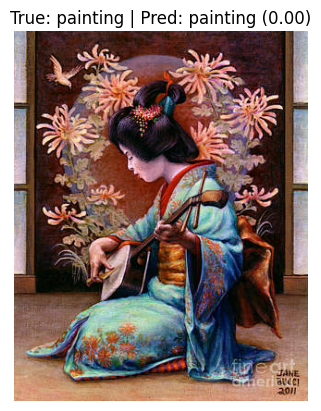

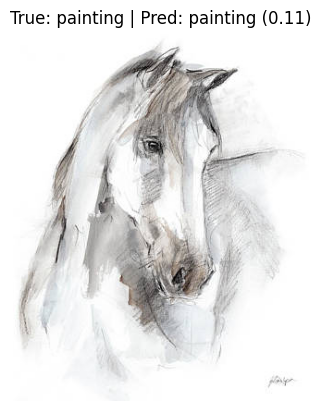

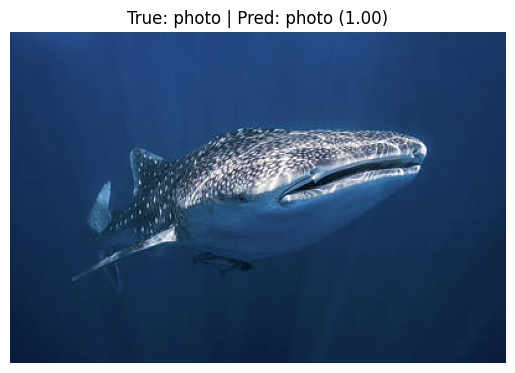

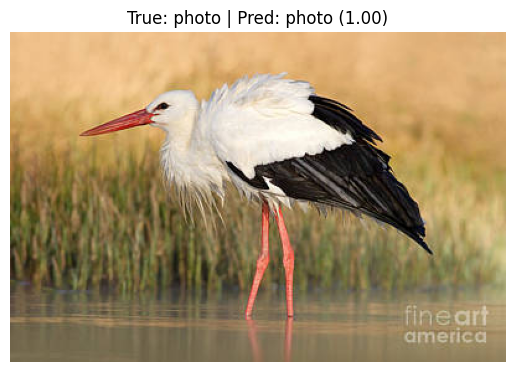

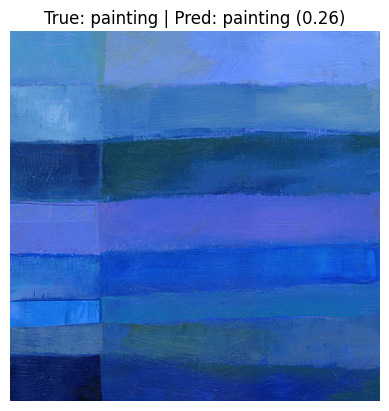

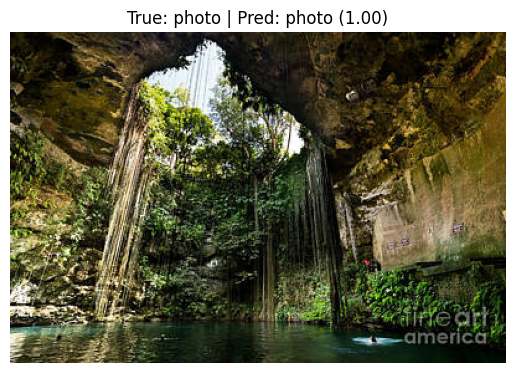

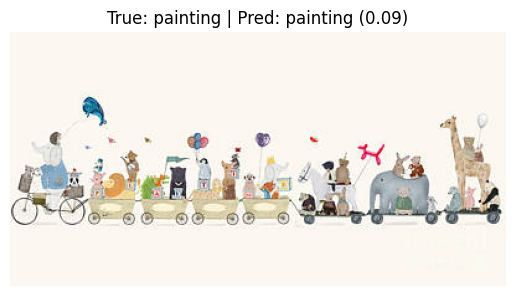

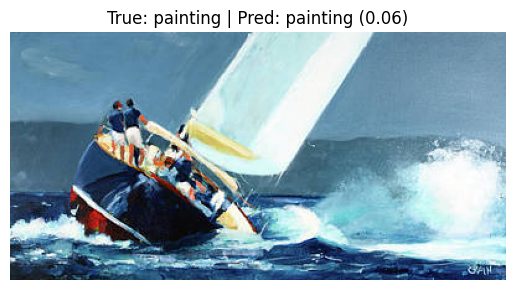

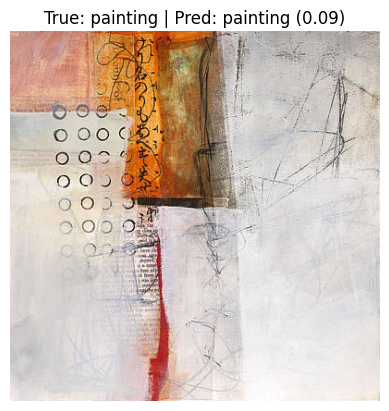

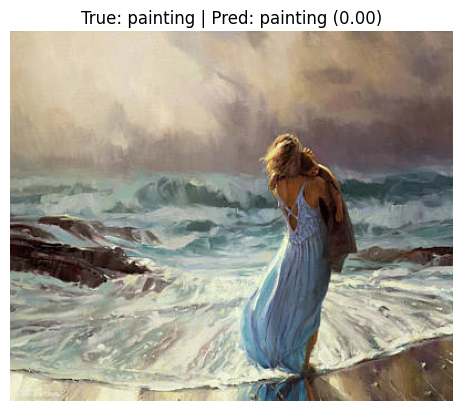


🎯 Overall test accuracy on 30 images: 96.67%


In [ ]:
# =====================================================
# Painting vs Photograph Classification - Improved Version
# =====================================================

# --- 1. Import Libraries ---
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import glob
from tensorflow.keras.preprocessing.image import load_img, img_to_array


# --- 2. Set Data Paths ---
train_dir = '../data/train'
val_dir = '../data/valid'
test_dir = '../data/rawData'

# --- 3. Data Generators ---
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create image generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# --- 4. Check Label Mapping ---
# The mapping tells us which label corresponds to "painting" or "photo"
print("Class indices:", test_generator.class_indices)
# Example output: {'painting': 0, 'photo': 1}

# --- 5. Build CNN Model ---
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # binary classification
])

# --- 6. Compile Model ---
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# --- 7. Train Model ---
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

# --- 8. Plot Training History ---
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# # --- 9. Evaluate on Test Data ---
# test_loss, test_acc = model.evaluate(test_generator)
# print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

# # --- 10. Predict Random Test Images ---
# sample_images, sample_labels = next(test_generator)
# predictions = model.predict(sample_images)
# predicted_classes = (predictions > 0.5).astype(int)

# # Randomly pick between available samples
# num_samples = len(sample_images)
# random_indices = random.sample(range(num_samples), min(10, num_samples))

# label_map = {v: k for k, v in test_generator.class_indices.items()}

# for i in random_indices:
#     plt.imshow(sample_images[i])
#     true_label = label_map[int(sample_labels[i])]
#     pred_label = label_map[int(predicted_classes[i][0])]
#     plt.title(f"True: {true_label}, Pred: {pred_label}")
#     plt.axis('off')
#     plt.show()

# Helper function to get valid image files only
def get_valid_images(folder):
    exts = ('.jpg', '.jpeg', '.png', '.bmp')
    files = [f for f in os.listdir(folder) if f.lower().endswith(exts)]
    return [os.path.join(folder, f) for f in files]

painting_dir = os.path.join(test_dir, 'painting')
photo_dir = os.path.join(test_dir, 'photos')

painting_images = get_valid_images(painting_dir)
photo_images = get_valid_images(photo_dir)

# Pick 100 random images from each category (if available)
num_samples = 100
painting_samples = random.sample(painting_images, min(num_samples, len(painting_images)))
photo_samples = random.sample(photo_images, min(num_samples, len(photo_images)))

# Combine both categories
test_images = [(img, 0) for img in painting_samples] + [(img, 1) for img in photo_samples]

# Shuffle to mix paintings and photos
random.shuffle(test_images)

print(f"✅ Testing on {len(test_images)} images ({len(painting_samples)} paintings, {len(photo_samples)} photos)\n")

# --- 9. Preprocess, Predict, and Evaluate ---
correct = 0
total = len(test_images)
label_map = {0: 'painting', 1: 'photo'}

for img_path, true_label in test_images:
    img = load_img(img_path, target_size=(150, 150))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array, verbose=0)[0][0]
    pred_label = int(prediction > 0.5)

    # Track correct predictions
    if pred_label == true_label:
        correct += 1

    plt.imshow(load_img(img_path))
    plt.title(f"True: {label_map[true_label]} | Pred: {label_map[pred_label]} ({prediction:.2f})")
    plt.axis('off')
    plt.show()

# --- 10. Overall Accuracy ---
accuracy = correct / total
print(f"\n🎯 Overall test accuracy on {total} images: {accuracy * 100:.2f}%")